In [1]:
import numpy as np
import pandas as pd

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


In [2]:
region_sizes = pd.read_csv("../outputs/stats_region_size.tsv", sep="\t")
region_sizes = region_sizes.query("region != 'start_proximal'")
region_sizes["constraint"] = region_sizes["constraint"].str.capitalize()

In [6]:
def plot_region_sizes(df, ax, region="transcript", legend=False, xlabel=False):

    # df = df.query(f"region == '{region}'").drop("region", axis=1)

    colors = {
        "Constrained": C.red,
        "Unconstrained": C.grey,
        "Indeterminate": adjust_lightness(C.grey, 0.5),
    }

    labels = {
        "transcript": "Transcript",
        "nmd_target": "NMD Target",
        "long_exon": "Long Exon",
        "distal_nmd": "Distal",
    }

    # n = df.constraint.nunique()
    # y = np.arange(n)
    # x = df[metric]

    sns.violinplot(
        ax=ax,
        data=df,
        x="size",
        y="region",
        hue="constraint",
        dodge=True,
        width=0.8,
        # cut=1,
        gridsize=4000,
        palette=colors,
        order=[
            "transcript",
            "nmd_target",
            "long_exon",
            "distal_nmd",
        ],
        hue_order=["Constrained", "Indeterminate", "Unconstrained"],
        scale="width",
        scale_hue=True,
        # inner="quartiles",
        linewidth=1,
    )
    ax.set_ylabel(None)
    # ax.set_yticks([0, 1.1, 2.2, 3.3,])
    ax.set_yticklabels([values for keys, values in labels.items()])
    ax.tick_params(axis="y", length=0, pad=7)
    ax.set_xlim((0, 3000))
    ax.set_xlabel("Region Size (nt)")
    # if xlabel: ax.set_xlabel(xlabel)

    ax.legend(
        bbox_to_anchor=(0, 1),
        loc="lower left",
        # labels=["Constrained", "Indeterminate", "Unconstrained"],
    )

    return None

In [7]:
cm = 1 / 2.54

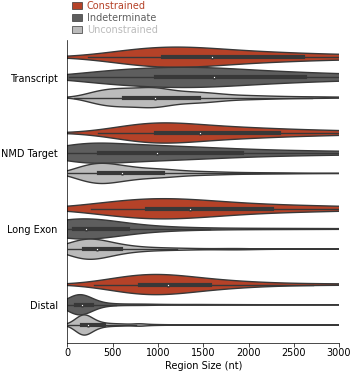

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8.9 * cm, 10 * cm))

plot_region_sizes(
    region_sizes,
    ax,
)